In [1]:
import pandas as pd

conversion_data=pd.read_csv('conversion_data.csv')

In [6]:
# check the data
conversion_data.head()

,country,age,new_user,source,total_pages_visited,converted
0,UK,25,1,Ads,1,0
1,US,23,1,Seo,5,0
2,US,28,1,Seo,4,0
3,China,39,1,Seo,5,0
4,US,30,1,Seo,6,0


In [14]:
conversion_data.describe()

,age,new_user,total_pages_visited,converted
count,316200.000000,316200.000000,316200.000000,316200.000000
mean,30.569858,0.685465,4.872966,0.032258
std,8.271802,0.464331,3.341104,0.176685
min,17.000000,0.000000,1.000000,0.000000
25%,24.000000,0.000000,2.000000,0.000000
50%,30.000000,1.000000,4.000000,0.000000
75%,36.000000,1.000000,7.000000,0.000000
max,123.000000,1.000000,29.000000,1.000000


remove outliers: where the customer's age is more than 100 years old.

In [15]:
conversion_data[conversion_data.age>=100]

,country,age,new_user,source,total_pages_visited,converted
90928,Germany,123,0,Seo,15,1
295581,UK,111,0,Ads,10,1


In [16]:
conversion_data=conversion_data[conversion_data.age<100]

Brainstorming:

1. whether customers from certain sources are more likely to create new accounts?

2. conversion rate comparison between new and old customers

3. the age of the customers can tell the difference between the conversion rate?

4. the region of the customers are tell the difference bettwen the conversion rate?? how to improve the conversion rate based on different regions(the most popular region and the region with the highest conersion rate, etc)?

5. relationship between page view and the conversion in the end?? Any cutoff??



### profiling

<AxesSubplot:>

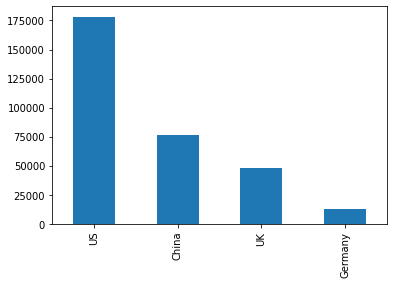

In [12]:
region_dist=conversion_data['country'].value_counts()
region_dist.plot(kind='bar')


<AxesSubplot:>

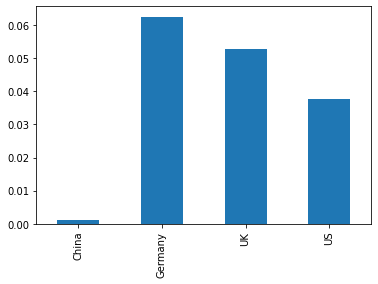

In [20]:
region_conversion_dist=conversion_data[conversion_data.converted==1]['country'].value_counts()/conversion_data['country'].value_counts()
region_conversion_dist.plot(kind='bar')

takesaways:

1. US has the highest pop and also the highest conversion rate

2. China has the 2nd highest pop but the conversion rate is much lower comparing with the other countries

3. Germany doesnt have a lot of pop but the conversion rate is really high

Based on these findings, the suggestions are at the following:

1. In order to increase the conversion rate in China, closer investigation is needed. Maybe the customers in China dont have full access to the website or the product? If they have a much higher bounce rate or click rage or some kind of tech issue? Maybe the customers dont understand the language? Is there a way we can provide a better and original translation for them? Whether they have difficult make payments because they tend to be more familiar with other payment methods?

2. Germany has really high conversion rate but a low population. We could consider launch more incentive programs or check the marketing strategy.

customers are mainly from 4 countries(US, China, UK, and Germany).

<AxesSubplot:>

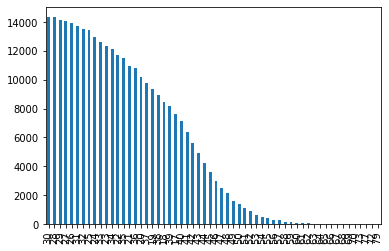

In [17]:
age_dist=conversion_data.age.value_counts()
age_dist.plot(kind='bar')

array([[<AxesSubplot:title={'center':'China'}>,
        <AxesSubplot:title={'center':'Germany'}>],
       [<AxesSubplot:title={'center':'UK'}>,
        <AxesSubplot:title={'center':'US'}>]], dtype=object)

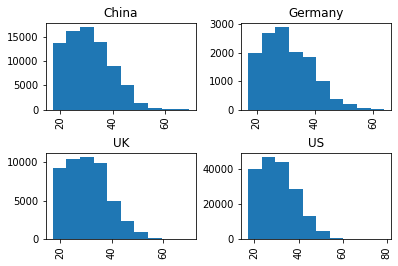

In [30]:
conversion_data['age'].hist(grid=False, by=conversion_data.country, bins=10)

array([[<AxesSubplot:title={'center':'China'}>,
        <AxesSubplot:title={'center':'Germany'}>],
       [<AxesSubplot:title={'center':'UK'}>,
        <AxesSubplot:title={'center':'US'}>]], dtype=object)

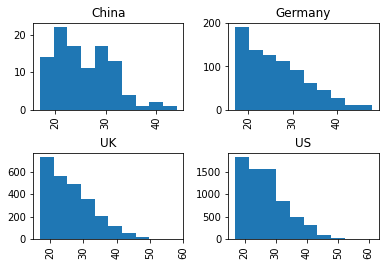

In [35]:
conversion_data[conversion_data.converted==1]['age'].hist(grid=False, by=conversion_data.country, bins=10)

takeaways:

1. the population in each country looks quite similar.

2. Young people in US, UK, and Germany are more likely to be converted; but the customers in China are more likely to be converted when people are around 30 years old. That could be, for example, young people in China tend to use competitors' product because we dont really have the concept they want. To improve conversion rate, we could target more on the young people(~20 years old) in China. Some interviews and field studying could be helpful in this case.

3. Germany doesnt have a noticable differencde than the US and the UK. We cannot make the conclusion that we failed to target at the right age group in Germany. But more marketing campaign or incentive programs could give us a larger market share because we dont have a lot customers from Germany overall.

<AxesSubplot:>

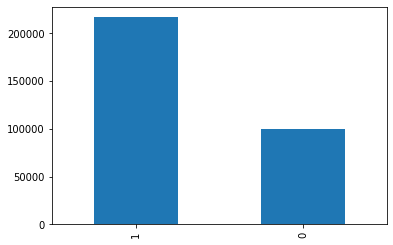

In [36]:
user_dist=conversion_data.new_user.value_counts()
user_dist.plot(kind='bar')

<AxesSubplot:>

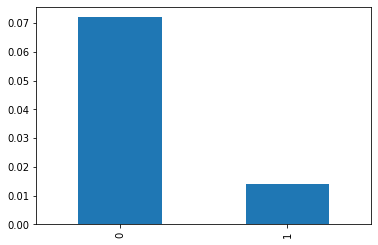

In [38]:
user_dist=conversion_data[conversion_data.converted==1].new_user.value_counts()/conversion_data.new_user.value_counts()
user_dist.plot(kind='bar')

<AxesSubplot:xlabel='country,new_user'>

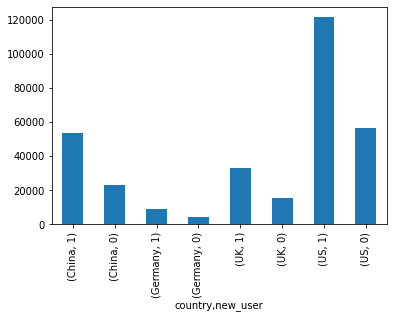

In [42]:
user_by_country=conversion_data.new_user.groupby(by=conversion_data.country).value_counts()
user_by_country.plot(kind='bar')

new users rate in each country:

<AxesSubplot:>

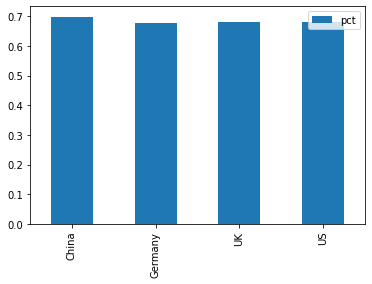

In [111]:
user_rate=user_by_country[user_by_country.new_user==1].reset_index()['count']/user_by_country.groupby(['country']).sum().reset_index()['count']
user_rate_df=pd.DataFrame({'pct':list(user_rate)}, index=list(user_by_country[user_by_country.new_user==1].reset_index().country))
user_rate_df.plot(kind='bar')

In [139]:
converted=conversion_data[conversion_data.converted==1].new_user.groupby(conversion_data.country).value_counts().reset_index(name='count')
total=conversion_data.new_user.groupby(conversion_data.country).value_counts().reset_index(name='count')
converted['total']=total['count']
converted['convert_pct']=converted['count']/converted['total']

# table manipulate
converted.loc[converted.new_user==0,'user']='old'
converted=converted.fillna('new')
converted['index']=converted['country']+'_'+converted['user']
converted

,country,new_user,count,total,convert_pct,user,index
0,China,0,66,53508,0.001233,old,China_old
1,China,1,36,23094,0.001559,new,China_new
2,Germany,0,588,8842,0.066501,old,Germany_old
3,Germany,1,227,4213,0.053881,new,Germany_new
4,UK,0,1773,32938,0.053828,old,UK_old
5,UK,1,776,15511,0.050029,new,UK_new
6,US,0,4732,121456,0.038961,old,US_old
7,US,1,2000,56636,0.035313,new,US_new


<AxesSubplot:xlabel='index'>

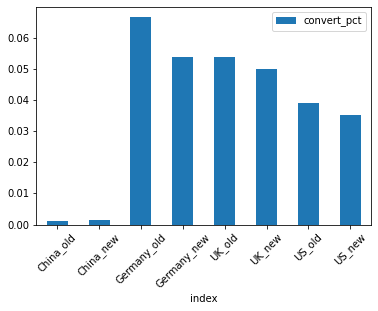

In [137]:
converted.plot(x='index',y='convert_pct',rot=45, kind='bar')

Takeaway:

1. new users in Germany, the US, and the UK have lower convertion rate comparing with the experienced users.

2. China has the opposite trend; while old users have a lower convertion rate indicating that we fail to retain those customers. If they didnt buy the product at the first time when they explosed to the product, there is a less chance they will buy it later. Further investigations need to be accomplished in the future.

<AxesSubplot:>

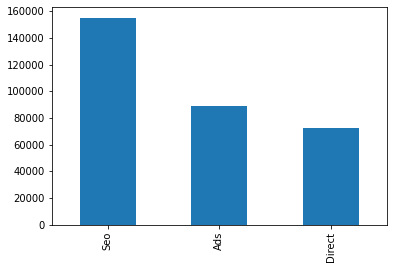

In [120]:
conversion_data.source.value_counts().plot(kind='bar')

<AxesSubplot:xlabel='index'>

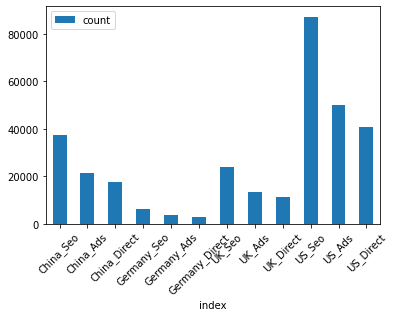

In [141]:
source_by_country=conversion_data.source.groupby(conversion_data.country).value_counts().reset_index(name='count')
source_by_country['index']=source_by_country['country']+'_'+source_by_country['source']
source_by_country.plot(kind='bar',x='index',y='count',rot=45)

takeaway:

1. customers are mainly from SEO. Consider more marketing?? Further analysis about advertising cost and profit.

<AxesSubplot:>

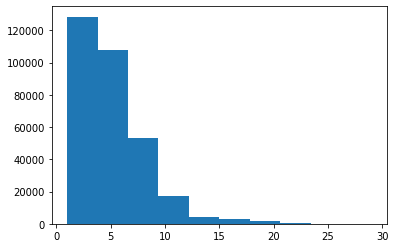

In [146]:
conversion_data.total_pages_visited.hist(grid=False, bins=10)

array([[<AxesSubplot:title={'center':'China'}>,
        <AxesSubplot:title={'center':'Germany'}>],
       [<AxesSubplot:title={'center':'UK'}>,
        <AxesSubplot:title={'center':'US'}>]], dtype=object)

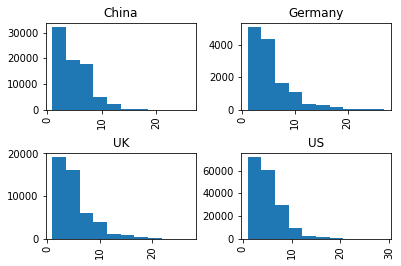

In [149]:
conversion_data.total_pages_visited.hist(grid=False, bins=10, by=conversion_data.country)

### Modeling

One-Hot Encoding: transform categorical variables into numeric forms and get the dataset X and y

split dataset into training and testing using sklearn.crossvalidation

In [150]:
X=conversion_data.copy()
X=pd.get_dummies(X)
X

,age,new_user,total_pages_visited,converted,country_China,country_Germany,country_UK,country_US,source_Ads,source_Direct,source_Seo
0,25,1,1,0,0,0,1,0,1,0,0
1,23,1,5,0,0,0,0,1,0,0,1
2,28,1,4,0,0,0,0,1,0,0,1
3,39,1,5,0,1,0,0,0,0,0,1
4,30,1,6,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
316195,26,1,9,0,0,0,0,1,1,0,0
316196,27,1,6,0,0,0,0,1,0,1,0
316197,25,0,4,0,1,0,0,0,1,0,0
316198,22,0,4,0,0,0,0,1,0,0,1


In [181]:
y = X.converted
X=X.drop(columns='converted')

In [173]:
# from sklearn.cross_validation import train_test_split

import sklearn
import sklearn.model_selection
import sklearn.linear_model
import numpy as np

In [188]:
X_train, X_test, y_train, y_test=sklearn.model_selection.train_test_split(X,y,test_size=0.3)

lr=sklearn.linear_model.LogisticRegressionCV(scoring='roc_auc',class_weight='balanced',max_iter=1000)
lr.fit(X_train, y_train)

LogisticRegressionCV(class_weight='balanced', max_iter=1000, scoring='roc_auc')

In [189]:
lr.C_

array([0.35938137])

In [190]:
lr.scores_

{1: array([[0.98228773, 0.98562727, 0.98689354, 0.98693608, 0.98691341,
         0.98690952, 0.98690957, 0.98690952, 0.98690957, 0.98690952],
        [0.98071805, 0.98382287, 0.98506516, 0.98514783, 0.98513288,
         0.98512958, 0.98512962, 0.98512958, 0.98512958, 0.98512962],
        [0.98213151, 0.98516075, 0.98636409, 0.98647047, 0.98646782,
         0.98646772, 0.98646782, 0.98646772, 0.98646787, 0.98646772],
        [0.98163525, 0.98488947, 0.9863162 , 0.9865326 , 0.98655774,
         0.9865562 , 0.9865562 , 0.9865562 , 0.98655769, 0.98655785],
        [0.9827499 , 0.98576928, 0.98711921, 0.98733468, 0.98736344,
         0.9873651 , 0.9873651 , 0.9873651 , 0.9873651 , 0.9873651 ]])}

In [191]:
lr.score(X_train, y_train)

0.9865341633117433

In [192]:
lr.score(X_test, y_test)

0.9849189513192179

In [193]:
from sklearn.metrics import classification_report,confusion_matrix

ytest_predict = lr.predict(X_test)
print(classification_report(y_true=y_test,y_pred=ytest_predict))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97     91799
           1       0.35      0.93      0.51      3061

    accuracy                           0.94     94860
   macro avg       0.67      0.94      0.74     94860
weighted avg       0.98      0.94      0.95     94860



In [198]:
importance=pd.DataFrame({'var name':X_train.columns,'coef':lr.coef_[0]})
importance['importance']=abs(importance.coef)
importance.sort_values(by=['importance'], ascending=False)

,var name,coef,importance
3,country_China,-2.754100,2.754100
1,new_user,-1.683980,1.683980
4,country_Germany,1.209924,1.209924
5,country_UK,0.892887,0.892887
2,total_pages_visited,0.768019,0.768019
6,country_US,0.532805,0.532805
8,source_Direct,-0.184761,0.184761
0,age,-0.072651,0.072651
7,source_Ads,0.051494,0.051494
9,source_Seo,0.014783,0.014783
